In [6]:
import PIL
import torch
from diffusers import StableDiffusionInpaintPipeline
import numpy as np
import matplotlib.pyplot as plt 
from skimage.transform import resize

In [2]:
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16
)
torch_device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = pipe.to(torch_device)


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

/home/torstein/miniconda3/envs/ml/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
Pipelines loaded with `torch_dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `torch_dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an acce

(1600, 1200, 3)
<class 'numpy.ndarray'>
(512, 512, 3)
filter (132837,)


TypeError: alpha must be a float, two-dimensional array, or None

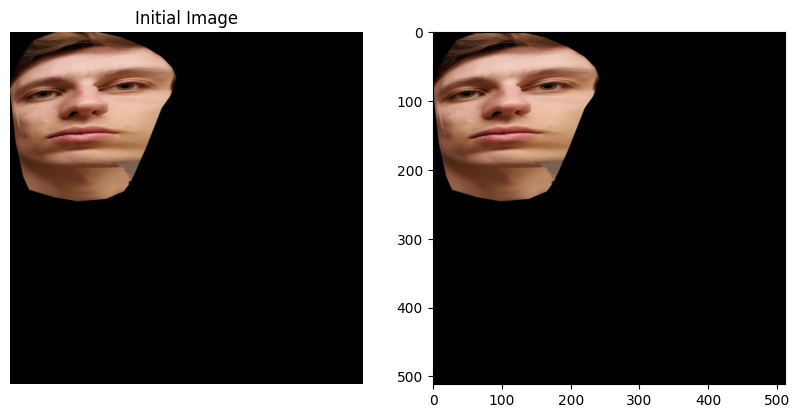

In [19]:


import PIL
import numpy as np
import matplotlib.pyplot as plt 
from skimage.transform import resize
init_image = PIL.Image.open('output/side_by_side_new_blending0.50.jpg')
init_image = np.array(init_image)

mask = np.logical_not(np.load("output/occlusion_mask.npy")).astype(float)


i_width = 512
i_height = 512

# init_image = init_image.transpose((2, 0, 1))
print(init_image.shape)
init_image = resize(np.asarray(init_image), output_shape=(i_height, i_width))
mask  = resize(mask, (i_height, i_width))[:, :, 0]
print(type(mask))
print(mask.shape)
#init_image[filter] = np.random.randn(*(init_image[filter].shape))*255
print("filter", init_image[mask==0].shape)
#init_image[mask==0] = np.random.randn(.shape)*255



fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.imshow(init_image)
ax.axis('off')
ax.set_title(f'Initial Image')
ax = fig.add_subplot(122)
ax.imshow(init_image, )
ax.imshow(mask, alpha=mask, cmap='Set1')
ax.axis('off')
ax.set_title(f'Initial Image with mask')
# pass

print(mask.shape)
print(init_image.shape)
print(init_image.max())
init_image *= 255

In [5]:
prompt = "high resolution, man, grey background"
image = pipe(prompt=prompt, image=init_image, mask_image=mask).images[0]

RuntimeError: "LayerNormKernelImpl" not implemented for 'Half'